In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [3]:
app = pd.read_csv(r"C:\Users\padwa\Downloads\EDA\application_data.csv")

In [4]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. Descriptive Statistics and Data Distribution

1.1 What is the distribution of the TARGET variable? How imbalanced is the dataset?

Ans: The TARGET variable is very imbalanced. Here the 0 is False and 1 is True. 91.9% False and 8% True

In [5]:
app['TARGET'].value_counts()/len(app['TARGET'])*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

1.2 What is the distribution of loan amounts (AMT_CREDIT) and total income (AMT_INCOME_TOTAL)?

In [6]:
app['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [7]:
app['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: ylabel='AMT_INCOME_TOTAL'>

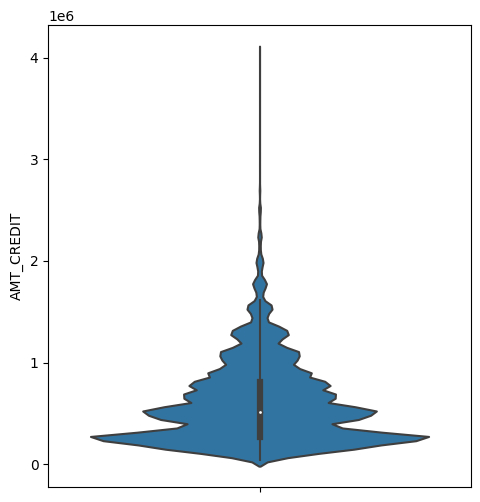

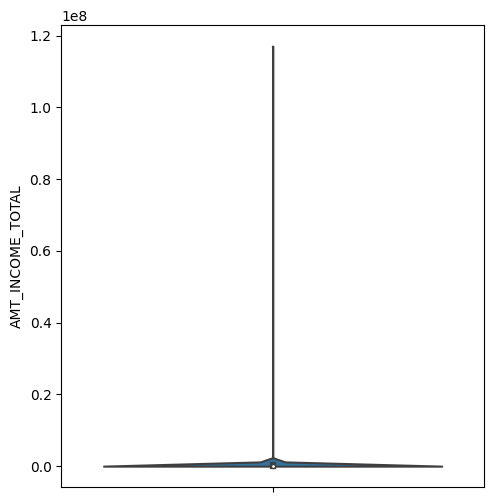

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(y=app['AMT_CREDIT'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(y=app['AMT_INCOME_TOTAL'])

1.3 What is the average, median, minimum, and maximum income of the applicants

Ans: Here, average = 168,797 median = 147,150 minimum= 256,500 maximum= 117,000,000

In [9]:
# AMT_INCOME_TOTAL is the column name of income of the applicants

app["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

# 2. Categorical Variables Analysis

2.1 How many male vs. female applicants are there? How does the default rate differ between genders?

Ans: There are 105,059 males and 202,448 females. Default rate for Male is 10.14% and for Female is 6.99%

In [10]:
app['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [11]:
default_rates = app.groupby('CODE_GENDER')['TARGET'].mean()
default_rates

CODE_GENDER
F      0.069993
M      0.101419
XNA    0.000000
Name: TARGET, dtype: float64

2.2 What is the distribution of the NAME_CONTRACT_TYPE variable, and how does the default rate differ between contract types?

In [12]:
contract_counts = app['NAME_CONTRACT_TYPE'].value_counts()
contract_counts

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

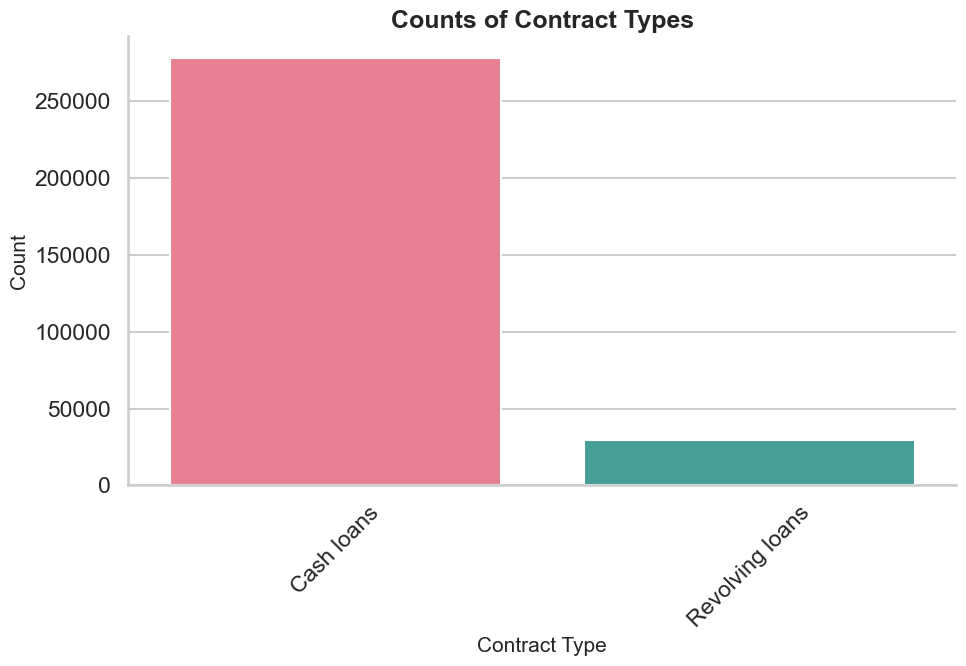

In [13]:
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(10, 7))

sns.barplot(x=contract_counts.index, y=contract_counts.values, palette="husl")
plt.title('Counts of Contract Types', fontsize = 18, fontweight = 'bold')
plt.xlabel('Contract Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 45)
sns.despine()
plt.tight_layout()
plt.show()

2.3 How does owning a car or real estate (FLAG_OWN_CAR, FLAG_OWN_REALTY) relate to the default rate?

Ans: Not owning a car and real estate is directly proportion to the default rate. 

In [14]:
car_default_rate = app.groupby('FLAG_OWN_CAR')['TARGET'].mean()
# car_default_rate

In [15]:
realty_default_rate = app.groupby('FLAG_OWN_REALTY')['TARGET'].mean()
# realty_default_rate

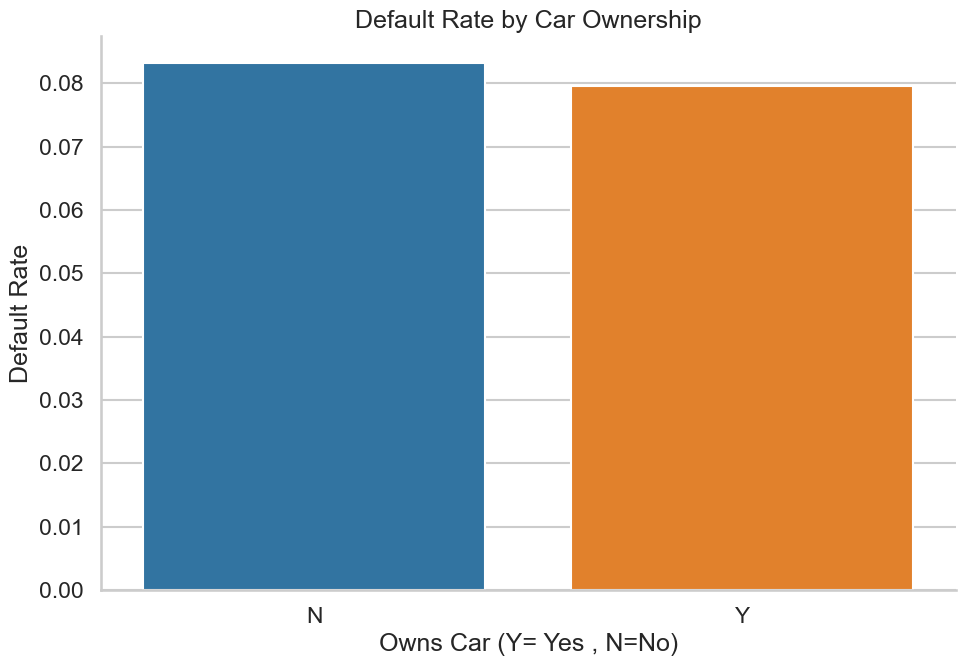

In [16]:
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize = (10,7))

sns.barplot(x=car_default_rate.index, y=realty_default_rate.values)
plt.title('Default Rate by Car Ownership')
plt.xlabel('Owns Car (Y= Yes , N=No)')
plt.ylabel('Default Rate')
sns.despine()
plt.tight_layout()
plt.show()

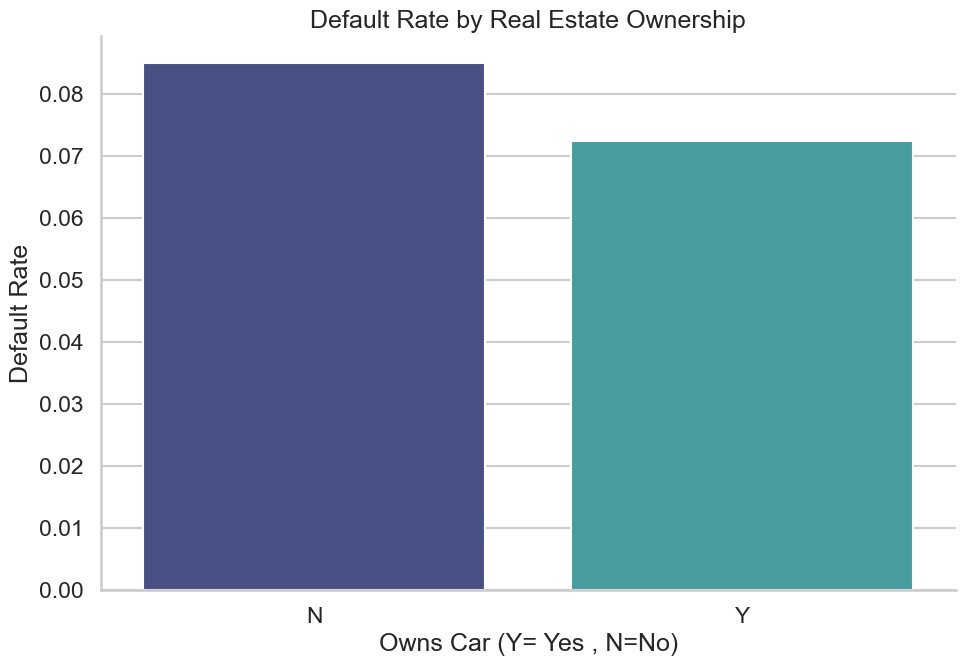

In [17]:
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize = (10,7))

sns.barplot(x=realty_default_rate.index, y=car_default_rate.values, palette = "mako")
plt.title('Default Rate by Real Estate Ownership')
plt.xlabel('Owns Car (Y= Yes , N=No)')
plt.ylabel('Default Rate')
sns.despine()
plt.tight_layout()
plt.show()

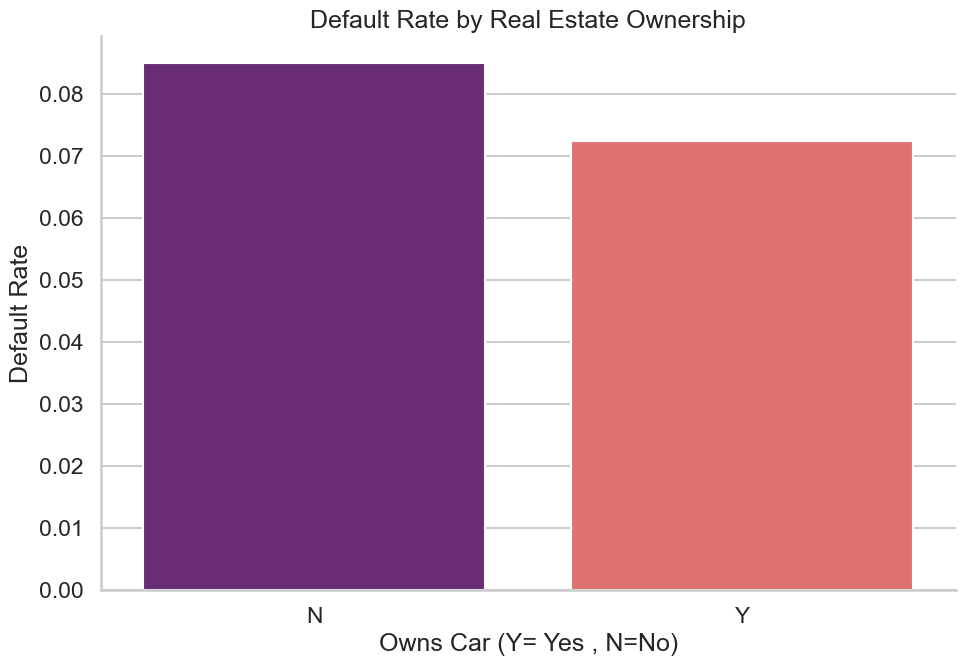

In [18]:
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize = (10,7))

sns.barplot(x=realty_default_rate.index, y=car_default_rate.values, palette = "magma")
plt.title('Default Rate by Real Estate Ownership')
plt.xlabel('Owns Car (Y= Yes , N=No)')
plt.ylabel('Default Rate')
sns.despine()
plt.tight_layout()
plt.show()

# 3. Relationships and Correlations

3.1 Is there a correlation between the applicant's income and the loan amount they're applying for?

In [19]:
# AMT_CREDIT is the Credit amount of the loan
# AMT_INCOME_TOTAL is the total income of the client

correlation = app['AMT_INCOME_TOTAL'].corr(app['AMT_CREDIT'])
correlation

# Pearson correlation coefficient: 
# A value close to 1 implies a strong positive correlation
# A value close to -1 implies a strong negative correlation
# A value close to 0 implies little to no linear correlation between the variables

0.15687027185193061

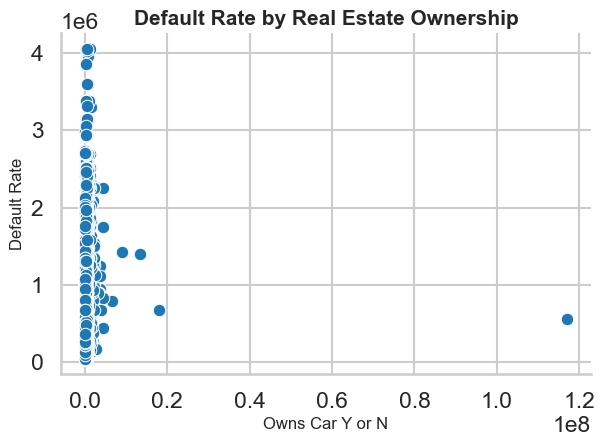

In [20]:
sns.scatterplot(x=app['AMT_INCOME_TOTAL'], y=app['AMT_CREDIT'])
plt.title('Default Rate by Real Estate Ownership', fontweight = 'bold', fontsize = 15)
plt.xlabel('Owns Car Y or N', fontsize = 12)
plt.ylabel('Default Rate', fontsize = 12)
sns.despine()
plt.tight_layout()
plt.show()


3.2 How does the number of children (CNT_CHILDREN) relate to the default rate?

In [21]:
correlation_children_and_default_rate = app['CNT_CHILDREN'].corr(app['TARGET'])
correlation_children_and_default_rate

0.019187133596270115

<Axes: xlabel='CNT_CHILDREN', ylabel='TARGET'>

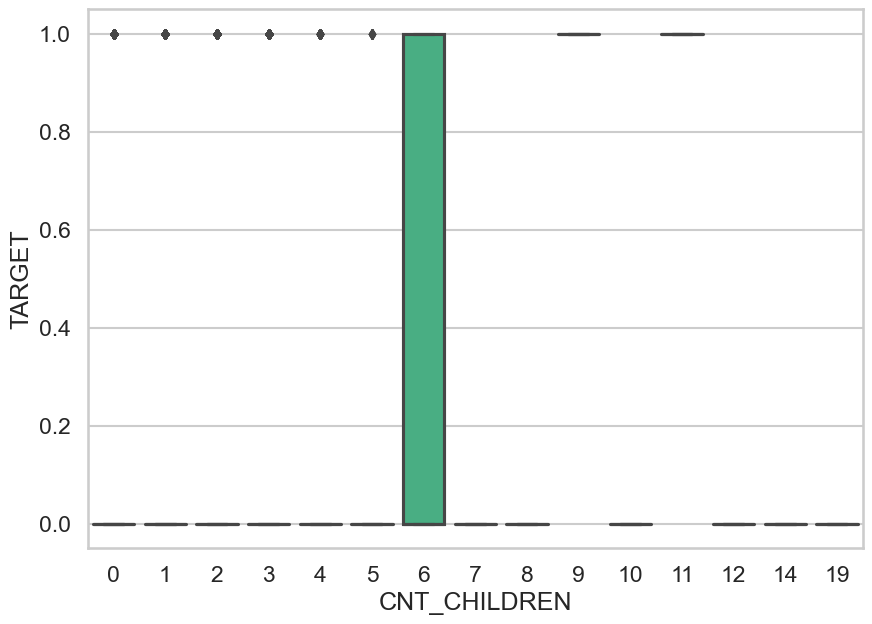

In [22]:
plt.figure(figsize = (10, 7))
sns.boxplot(x=app['CNT_CHILDREN'], y=app['TARGET'])

3.3 Are there correlations between any of the FLAG_DOCUMENT_18 columns and the default rate?

-0.007952385099462445 - This suggests that there is almost no coorelation between the 2 columns.

In [23]:
correlation_rate_flag_doc = app['FLAG_DOCUMENT_18'].corr(app['TARGET'])
correlation_rate_flag_doc

-0.007952385099462445

# 4. Missing Values Analysis

4.1 Which columns have missing values and how many?

> The sum of all the missing values of all the columns is: 9152465 

> Total columns are 67 with missing values

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#had to run this to view all the 67 columns

In [25]:
missing_values = app.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_M

In [26]:
max_missing_values = missing_values.sort_values(ascending = False).head(10)
max_missing_values

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_AVG        210199
dtype: int64

In [27]:
missing_values = missing_values.sum()
print(r'The sum of all the missing values of all the columns is:', missing_values)

The sum of all the missing values of all the columns is: 9152465


4.2 How does the presence of missing values in certain columns relate to the default rate?

In [28]:
# for this question we will take 3 random sample columns and find the correlation between 

missing_values = app[app['AMT_ANNUITY'].isnull()]
non_missing_values = app[app['AMT_ANNUITY'].notnull()]

default_rate_missing = missing_values['TARGET'].mean()
default_rate_non_missing = non_missing_values['TARGET'].mean()

print(r'Default rate for rows with missing AMT_ANNUITY :' , default_rate_missing)
print(r'Default rate for rows with non-missing AMT_ANNUITY : ' , default_rate_non_missing)

Default rate for rows with missing AMT_ANNUITY : 0.0
Default rate for rows with non-missing AMT_ANNUITY :  0.08073196986006459


In [29]:
missing_values = app[app['COMMONAREA_MEDI'].isnull()]
non_missing_values = app[app['COMMONAREA_MEDI'].notnull()]

default_rate_missing = missing_values['TARGET'].mean()
default_rate_non_missing = non_missing_values['TARGET'].mean()

print(r'Default rate for rows with missing COMMONAREA_MEDI :' , default_rate_missing)
print(r'Default rate for rows with non-missing COMMONAREA_MEDI : ' , default_rate_non_missing)

Default rate for rows with missing COMMONAREA_MEDI : 0.08574221022502501
Default rate for rows with non-missing COMMONAREA_MEDI :  0.06910174211514798


In [30]:
missing_values = app[app['EXT_SOURCE_1'].isnull()]
non_missing_values = app[app['EXT_SOURCE_1'].notnull()]

default_rate_missing = missing_values['TARGET'].mean()
default_rate_non_missing = non_missing_values['TARGET'].mean()

print(r'Default rate for rows with missing EXT_SOURCE_1 :' , default_rate_missing)
print(r'Default rate for rows with non-missing EXT_SOURCE_1 : ' , default_rate_non_missing)

Default rate for rows with missing EXT_SOURCE_1 : 0.08519535350505832
Default rate for rows with non-missing EXT_SOURCE_1 :  0.07495545466067262


# 5. Outliers Analysis

> 5.1 Are there any outliers in the continuous variables, like AMT_INCOME_TOTAL or AMT_CREDIT?

> 5.2 How do outliers impact the default rate?

In [46]:
# An Outlier(s) is/are data points that differ significantly from other points. They can be found using Visualization methods and z-score method.

# Z-score: The Z-score represents how many Standard Deviations a data point is from the mean. 
# A Z-score greater than 3 or smaller than -3 indicated an outlier.

z_score_income = np.abs(stats.zscore(app['AMT_INCOME_TOTAL'].dropna()))
z_score_credit = np.abs(stats.zscore(app['AMT_CREDIT'].dropna()))

outliers_income = z_score_income > 3
outliers_credit = z_score_credit > 3

print(r'outliers in AMT_INCOME coln : ' , outliers_income.sum())
print(r'outliers in CREDIT coln : ' , outliers_credit.sum())


outliers in AMT_INCOME coln :  454
outliers in CREDIT coln :  3255
